# The aim of this project is to predict house prices in Boston, using regression algorithms. Dataset includes data from 1960. 

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Kuba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Imports

In [9]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import os

## Setting up local environment 

In [10]:
PROJECT_DIR = os.path.join(os.getcwd(),"boston_housing_2022")
DATA_DIR = os.path.join(PROJECT_DIR,"data")
PLOTS_DIR = os.path.join(PROJECT_DIR, "plots")
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

# Gathering Data

In [11]:
boston_dataset = load_boston()
dir(boston_dataset)

C:\Users\Kuba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [52]:
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data Exploration

In [53]:
#Create a pandas dataframe
data = pd.DataFrame(data = boston_dataset.data,columns = boston_dataset.feature_names)

#Add a column with house prices
data["PRICE"] = boston_dataset.target

In [54]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [55]:
#Saving data into data directory (with csv extension)
data.to_csv("boston_housing_2022\data\housing.csv")

In [56]:
data["PRICE"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [57]:
# Check for missing values
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

# Visualising Data

C:\Users\Kuba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kuba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kuba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

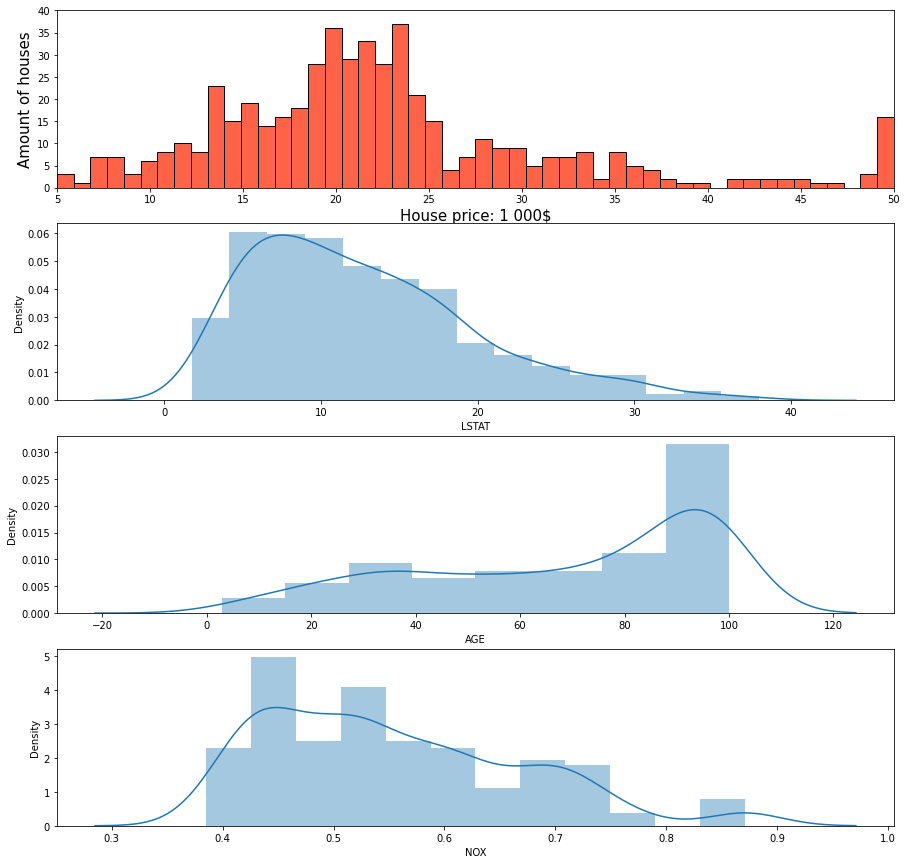

In [58]:
plt.figure(figsize=[15,15])
plt.subplot(4,1,1)

plt.hist(data["PRICE"],bins=50,ec="black",color = "tomato")
plt.xlim(5,50)
plt.ylim(0,40)
plt.ylabel("Amount of houses",fontsize = 15)
plt.xlabel("House price: 1 000$",fontsize = 15)


plt.subplot(4,1,2)
sns.distplot(data["LSTAT"])

plt.subplot(4,1,3)
sns.distplot(data["AGE"])


plt.subplot(4,1,4)
sns.distplot(data["NOX"])
plt.savefig(os.path.join(PLOTS_DIR,'Price Histogram andFeatures_distplots.jpg'), dpi=300 )


# Correlation Check

In [59]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

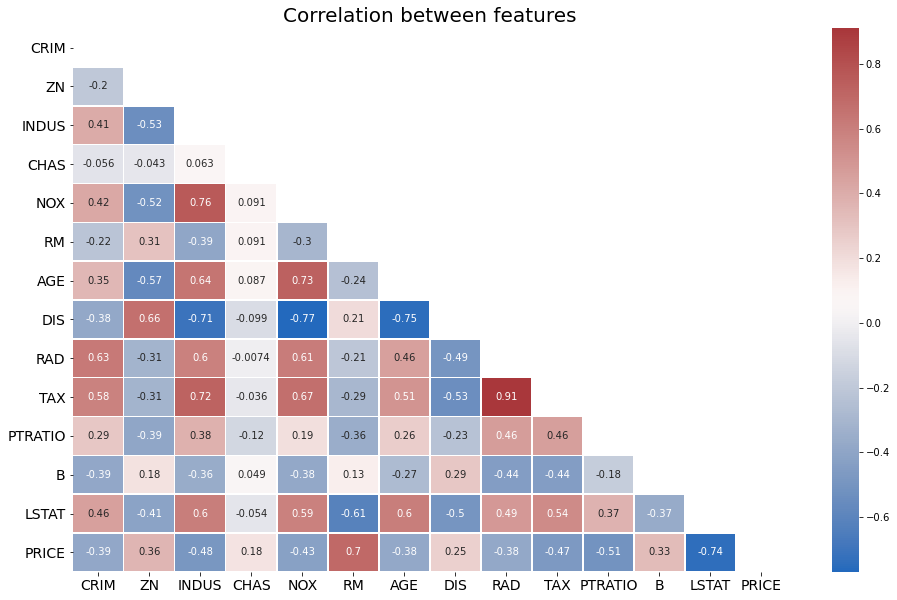

In [60]:
plt.figure(figsize = [16,10])
sns.heatmap(data.corr(),cmap="vlag",annot=True,linewidths=.5,mask=mask)
plt.title("Correlation between features",fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig(os.path.join(PLOTS_DIR,'Correlation.jpg'), dpi=300 )


### RAD and TAX strongly correlate with each other, but visualisation shows, it is a fake correlation based on extreme values

C:\Users\Kuba\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


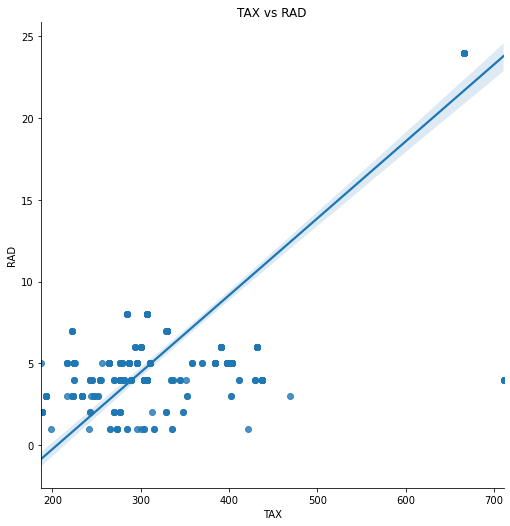

In [61]:
#looking for pattern, there's none and for sure it will be important in model signification 
sns.lmplot(x = "TAX",y = "RAD",data=data,size=7)
plt.title("TAX vs RAD")
plt.savefig(os.path.join(PLOTS_DIR,'TAX_RAD.jpg'), dpi=100 )


## Lstat (Lower status of the population) is correlated with price in opposite way, correlation is clearly visible

C:\Users\Kuba\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


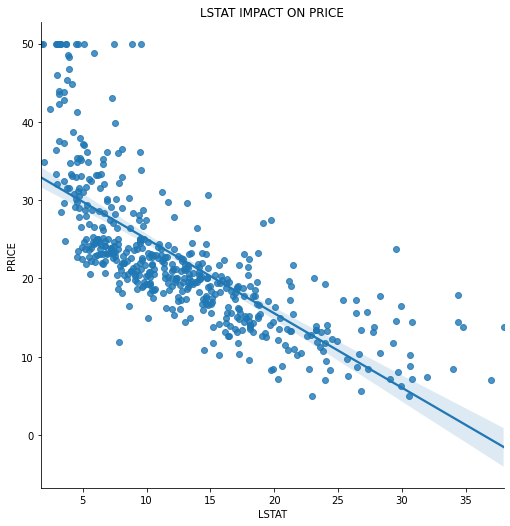

In [62]:
#looking for pattern, this one make sense
sns.lmplot(x = "LSTAT",y = "PRICE",data=data,size=7)
plt.title("LSTAT IMPACT ON PRICE")
plt.savefig(os.path.join(PLOTS_DIR,'LSTAT_PRICE.jpg'), dpi=300 )


## Number of rooms (RM) is strongly correlated with price

C:\Users\Kuba\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


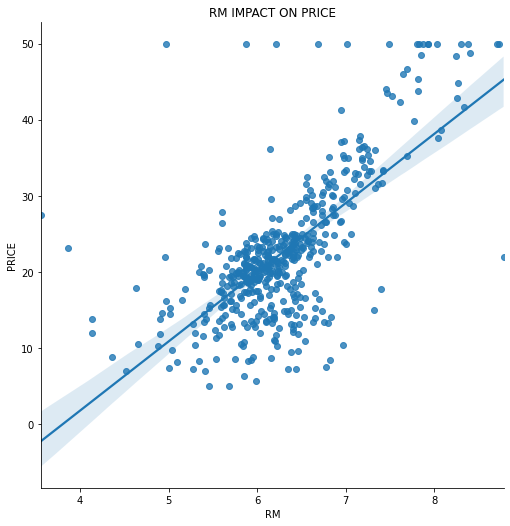

In [63]:
#looking for pattern, this one make sense
sns.lmplot(x = "RM",y = "PRICE",data=data,size=7)
plt.title("RM IMPACT ON PRICE")
plt.savefig(os.path.join(PLOTS_DIR,'RM_PRICE.jpg'), dpi=300 )

# Training, Valid & Test Dataset Split (models will be based on unchanged data)

In [64]:
prices = data["PRICE"]
features = data.drop("PRICE",axis = 1)

X_train_1,X_test,y_train_1,y_test = train_test_split(features,prices, 
                                                 test_size=0.2,random_state=10)

X_train,X_valid,y_train,y_valid = train_test_split(X_train_1,y_train_1, 
                                                 test_size=0.25,random_state=10)

In [65]:
scaler = StandardScaler()

In [66]:
def give_metrics(predicted_values,y_val):
    MSE = mean_squared_error(predicted_values,y_val)
    RMSE = np.sqrt(MSE)
    mae = MAE(predicted_values,y_val)
    print("R-Squared: ", r2_score(predicted_values,y_val))
    print("MAE: ", mae)
    print("MSE: ", MSE)
    print("RMSE: ",RMSE)



## Raw Linear Regression Model

In [68]:
regr = LinearRegression()
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_metrics(predicted_values=predicted_values,y_val=y_valid)

R-Squared:  0.6663093667162863
MAE:  3.324097070867019
MSE:  17.8886713629892
RMSE:  4.229500131574557


## Raw Decision Tree Model

In [69]:
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_metrics(predicted_values=predicted_values,y_val=y_valid)

R-Squared:  0.7726787194541962
MAE:  2.5712871287128714
MSE:  12.133762376237623
RMSE:  3.4833550459632483


## Raw Random Forest Model

In [70]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_metrics(predicted_values=predicted_values,y_val=y_valid)

R-Squared:  0.8308506284427554
MAE:  2.0016336633663396
MSE:  7.705989336633674
RMSE:  2.7759663788730715


## Raw XGBoost Model

In [71]:
regr = XGBRegressor(random_state=0)
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_metrics(predicted_values=predicted_values,y_val=y_valid)

R-Squared:  0.8448057780083199
MAE:  2.0586465854455933
MSE:  7.692106814413001
RMSE:  2.773464767112249


# Upgrading Linear Regression Model (Check for Statictical Significance and Multicollinearity)

In [72]:
X_incl_const = sm.add_constant(X_train)

#for statictical significance
model = sm.OLS(y_train,X_incl_const)
results = model.fit()

#For multicollinearity
VIF_list = []
for n in range(len(X_train.columns)+1):
    VIF_list.append(variance_inflation_factor(exog = X_incl_const.values,exog_idx=n))


In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           4.50e-82
Time:                        11:00:49   Log-Likelihood:                -885.08
No. Observations:                 303   AIC:                             1798.
Df Residuals:                     289   BIC:                             1850.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0548      6.473      5.879      0.000      25.314      50.795
CRIM          -0.1675      0.048     -3.504      0.001      -0.262      -0.073
ZN             0.0687      0.018      3.915      0.000       0.034       0.103
INDUS         -0.0038      0.078     -0.049      0.961      -0.158       0.150
CHAS           1.7027      1.069      1.592      0.112      -0.402       3.807
NOX          -19.0826      4.712     -4.050      0.000     -28.357      -9.808
RM             3.2407      0.526      6.159      0.000       2.205       4.276
AGE            0.0326      0.017      1.882      0.061      -0.001       0.067
DIS           -1.5416      0.240     -6.413      0.000      -2.015      -1.068
RAD            0.3837      0.085      4.519      0.000       0.217       0.551
TAX           -0.0137      0.005     -2.817      0.005      -0.023      -0.004
PTRATIO       -0.9214      0.169     -5.461      0.000      -1.254      -0.589
B              0.0131      0.003      4.109      0.000       0.007       0.019
LSTAT         -0.5926      0.061     -9.691      0.000      -0.713      -0.472
==============================================================================
Omnibus:                      103.659   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.383
Skew:                           1.403   Prob(JB):                     2.58e-93
Kurtosis:                       8.090   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# Threshhold for P_values = 0.05, so P_values < 0.05 means values are statistically significance
# Threshhold for VIF = 10, so VIF < 10 means multicollinearity, TAX is close enough, and after a try I ruled it out
pd.DataFrame({'p-values' : round(results.pvalues,3), "VIF" : np.around(VIF_list,3)})

,p-values,VIF
const,0.000,600.370
CRIM,0.001,2.074
ZN,0.000,2.350
INDUS,0.961,4.168
CHAS,0.112,1.103
NOX,0.000,4.563
RM,0.000,1.926
AGE,0.061,3.327
DIS,0.000,3.924
RAD,0.000,8.368


# Model Simplification for all models (Dropping "INDUS", "AGE" and extreme values)

In [75]:
data.drop(data[data.TAX > 500].index, inplace=True) #Exluding extremes
prices = np.log(data["PRICE"]) #Log prices are closer to normal distribution
features = data.drop(["PRICE","INDUS","AGE","CHAS"],axis = 1)


X_train_1,X_test,y_train_1,y_test = train_test_split(features,prices, 
                                                 test_size=0.2,random_state=10)

X_train,X_valid,y_train,y_valid = train_test_split(X_train_1,y_train_1, 
                                                 test_size=0.25,random_state=10)

## Data standardization

In [76]:
scaler = StandardScaler()


scaled_X_train, scaled_X_valid = scaler.fit_transform(X_train),scaler.fit_transform(X_valid)
scaled_y_train, scaled_y_valid = scaler.fit_transform(np.reshape(np.array(y_train),(-1,1))),scaler.fit_transform(np.reshape(np.array(y_valid),(-1,1)))

In [77]:
def give_npe_metrics(predicted_values,y_test):
    MSE = mean_squared_error(predicted_values,y_test)
    RMSE = np.sqrt(MSE)
    mae = MAE(predicted_values,y_test)
    print("R-Squared: ", r2_score(predicted_values,y_test))
    print("MAE: ", np.e**mae)
    print("MSE: ", np.e**MSE)
    print("RMSE: ",np.e**RMSE)


# Upgrading Linear Regression Model (Set the appropriate hiperparameters)

In [78]:
param_grid= [ {
              'fit_intercept': [False,True], 
               'n_jobs': [5,15,25,35,45,55,70,80,90,120,150,200] ,
               'positive' :[True,False],
                
               }  ]

In [79]:
esti= LinearRegression()
grid_search=GridSearchCV(esti,param_grid)
grid_search.fit(X_valid,y_valid.ravel())
print('\nBest Params\n'.upper(), grid_search.best_params_)
print('\nBest estimator\n'.upper(), grid_search.best_estimator_)


BEST PARAMS
 {'fit_intercept': True, 'n_jobs': 5, 'positive': False}

BEST ESTIMATOR
 LinearRegression(n_jobs=5)


## Final Linear Regression Model

In [80]:
regr = grid_search.best_estimator_
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=y_valid)

R-Squared:  0.8186607585497574
MAE:  1.0892311926198668
MSE:  1.0148480561770625
RMSE:  1.1290808374634687


## Final Linear Regression Model but with standardized data

In [81]:
regr = LinearRegression(fit_intercept = True,n_jobs = 5,positive = False,normalize=False) #Normalization has 
                                                                            #to be False when data are standardized
regr.fit(scaled_X_train,scaled_y_train.ravel()) 
predicted_values = regr.predict(scaled_X_valid)
give_npe_metrics(predicted_values=predicted_values,y_test=scaled_y_valid.ravel())

R-Squared:  0.7976633872195245
MAE:  1.3656126321883029
MSE:  1.186664867451179
RMSE:  1.5124016013163561


C:\Users\Kuba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


# Upgrading Decision Tree Model (Set the appropriate hiperparameters)

In [82]:
param_grid= [ {
              'max_depth': [2, 10, 25,50,100,200], 
               'max_leaf_nodes': [5,15,25,35,45,55,70,80,90,120,150,200] ,
               'min_samples_leaf' :[1,2,3,4,5,6,7,9,10],
                "random_state" : [4]
               }  ]

In [83]:
esti= DecisionTreeRegressor()
grid_search=GridSearchCV(esti,param_grid)
grid_search.fit(X_valid,y_valid.ravel())
print('\nBest Params\n'.upper(), grid_search.best_params_)
print('\nBest estimator\n'.upper(), grid_search.best_estimator_)


BEST PARAMS
 {'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_leaf': 6, 'random_state': 4}

BEST ESTIMATOR
 DecisionTreeRegressor(max_depth=10, max_leaf_nodes=15, min_samples_leaf=6,
                      random_state=4)


## Final Decision Tree Model

In [84]:
regr = grid_search.best_estimator_
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=y_valid)

R-Squared:  0.71044640296075
MAE:  1.1117783698371024
MSE:  1.0184791105920745
RMSE:  1.1448986278461477


## Standardized Decision Tree Model

In [85]:
regr = grid_search.best_estimator_
regr.fit(scaled_X_train,scaled_y_train.ravel())
predicted_values = regr.predict(scaled_X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=scaled_y_valid.ravel())

R-Squared:  0.7538960629498441
MAE:  1.3897874810198252
MSE:  1.212105638655911
RMSE:  1.550515654926403


# Upgrading Random Forest Model (Set the appropriate hiperparameteres)

In [86]:
param_grid= [ {
              'max_depth': [10,20,50], 
               'max_leaf_nodes': [15,30,50,150], 
                "random_state" : [4],
                "n_estimators" : [50,100,250]
               }  ]

In [87]:
esti= RandomForestRegressor()
grid_search=GridSearchCV(esti,param_grid)
grid_search.fit(X_valid,y_valid.ravel())
print('\nBest Params\n'.upper(), grid_search.best_params_)
print('\nBest estimator\n'.upper(), grid_search.best_estimator_)


BEST PARAMS
 {'max_depth': 10, 'max_leaf_nodes': 15, 'n_estimators': 100, 'random_state': 4}

BEST ESTIMATOR
 RandomForestRegressor(max_depth=10, max_leaf_nodes=15, random_state=4)


## Final Random Forest Model

In [88]:
regr = grid_search.best_estimator_
regr.fit(X_train,y_train)
predicted_values = regr.predict(X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=y_valid)

R-Squared:  0.7838799706406339
MAE:  1.0883689045534868
MSE:  1.0137174115790077
RMSE:  1.123807710432454


## Final Random Forest Model with scaled data

In [89]:
regr = grid_search.best_estimator_
regr.fit(scaled_X_train,scaled_y_train.ravel())
predicted_values = regr.predict(scaled_X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=scaled_y_valid.ravel())

R-Squared:  0.7495909698140029
MAE:  1.3964073621684694
MSE:  1.2046757049828285
RMSE:  1.53959752980754


# Upgrading XGBoost Model (Set the appropriate hiperparameters)

In [90]:
param_grid= [ {
              #It chooses all params by itself, that's why I leave it empty
               }  ]

In [91]:
esti= XGBRegressor()
grid_search=GridSearchCV(esti,param_grid)
grid_search.fit(X_valid,y_valid.ravel())
print('\nBest estimator\n'.upper(), grid_search.best_estimator_)


BEST ESTIMATOR
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


## Final XGBoost Model

In [92]:
regr = grid_search.best_estimator_
regr.fit(X_train, y_train)
predicted_values = regr.predict(X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=y_valid)

R-Squared:  0.8359608548351839
MAE:  1.0806366276772454
MSE:  1.0109813602664746
RMSE:  1.1101620490027484


## Final XGBoost Model with scaled data

In [93]:
regr = grid_search.best_estimator_
regr.fit(scaled_X_train,scaled_y_train.ravel())
predicted_values = regr.predict(scaled_X_valid)

give_npe_metrics(predicted_values=predicted_values,y_test=scaled_y_valid.ravel())

R-Squared:  0.7656540775498459
MAE:  1.4021280984835252
MSE:  1.1915876378384542
RMSE:  1.5199423198864728


# R-Squared value shows that XGBoost is the best choice. MAE is close to 1, that means model is wrong by an average of a thousand dollars.

# Final predictions on Test Data, Model is fitted based on all of training data, including validation set (X_train_1 was created before train_val split)

In [94]:
regr = grid_search.best_estimator_
regr.fit(X_train_1, y_train_1) 
predicted_values = regr.predict(X_test)

give_npe_metrics(predicted_values=predicted_values,y_test=y_test)

R-Squared:  0.9002154211103929
MAE:  1.0836938539970562
MSE:  1.0101650030675435
RMSE:  1.1057975374159328


## FInal model explains about 90% of prices variance.  MAE is close to 1, that means model is wrong by an average of a thousand dollars. The two main reasons to use XGBoost are execution speed and model performance. XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems. The evidence is that it is the go-to algorithm for competition winners on the Kaggle competitive data science platform. Ensemble algorithms (DecisionTree,RandomForest,XGBoost)  don't need scaled data, thats why standardization doesn't have significant impact on results. Only Linear Regressor should improve its results on scaled data, but it got worse. 

## All algorithms gave similar results, but XGBoost was the best, RandomForest took second place. Both algorithms performed better on the default parameters. 

## In my opinion the only way to improve the results would be to choose better parameters into GRID, better features or transformations. But 0.9 R_squared is a passable result.